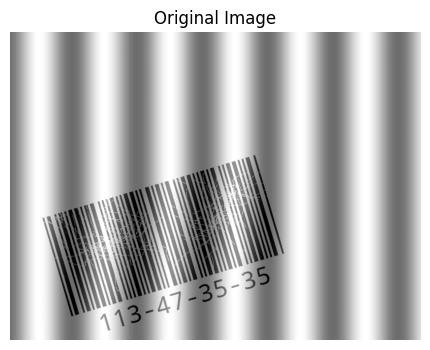

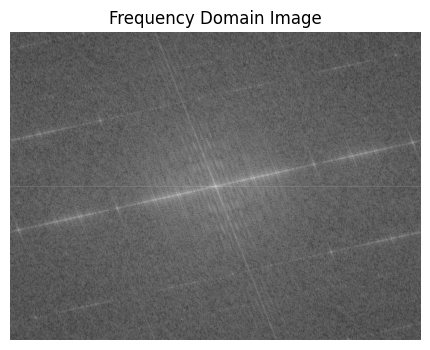

C:\Users\Saleh Ahmed\AppData\Local\Temp\ipykernel_11820\2740836734.py:87: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_filtered = np.log(np.abs(f_transform_filtered) )


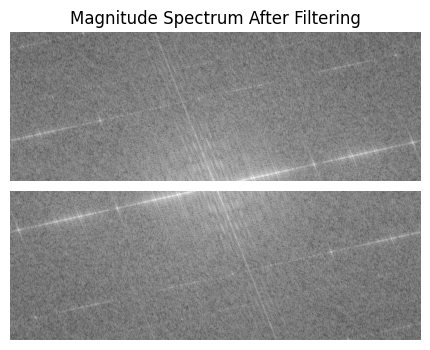

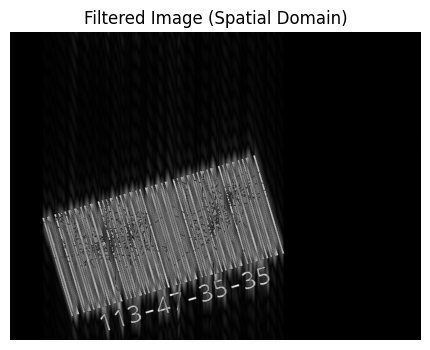

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft

# Load the image from file
img_path = "test cases/11 - bayza 5ales di bsara7a.jpg"
image = Image.open(img_path).convert('L')  # Convert to grayscale

# Display the original image
plt.figure(figsize=(6, 4))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

def transform_image_to_frequency_domain(image):
    # Convert image to numpy array
    img_array = np.array(image)
    
    # Apply Fourier Transform
    f_transform = fft.fft2(img_array)
    
    # Shift the zero frequency component to the center
    f_transform_centered = fft.fftshift(f_transform)
    
    # Magnitude Spectrum
    magnitude_spectrum = np.log(np.abs(f_transform_centered) + 1)
    
    return f_transform_centered, magnitude_spectrum

# Perform the transformation
f_transform_centered, magnitude_spectrum = transform_image_to_frequency_domain(image)

# Plot the frequency domain image
plt.figure(figsize=(6, 4))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Frequency Domain Image")
plt.axis('off')
plt.show()

import numpy as np

def apply_band_stop_filter(f_transform, direction='horizontal', size=8, width=None):
    """
    Apply a band-stop filter to the Fourier transformed image.

    Parameters:
    - f_transform: 2D numpy array, Fourier transform of the image.
    - direction: str, 'horizontal' or 'vertical' direction for the band stop.
    - size: int, half the height (if horizontal) or half the width (if vertical) of the band-stop area.
    - width: int or None, width of the band across the center of the frequency domain to be zeroed out. If None, it defaults to the full width (horizontal) or height (vertical).

    Returns:
    - f_transform_filtered: 2D numpy array, the filtered Fourier transform.
    """
    rows, cols = f_transform.shape
    crow, ccol = rows // 2, cols // 2
    
    # Create a mask with True values at indices that are outside the band-stop area
    mask = np.ones((rows, cols), dtype=bool)
    
    if direction == 'horizontal':
        if width is None:
            width = cols  # Apply across the full width
        start_col = max(0, ccol - width // 2)
        end_col = min(cols, ccol + width // 2)
        mask[crow-size:crow+size, start_col:end_col] = False
    elif direction == 'vertical':
        if width is None:
            width = rows  # Apply across the full height
        start_row = max(0, crow - width // 2)
        end_row = min(rows, crow + width // 2)
        mask[start_row:end_row, ccol-size:ccol+size] = False
    
    # Apply the mask to the frequency transform
    f_transform_filtered = f_transform * mask
    
    return f_transform_filtered




# Apply the band-stop filter
f_transform_filtered = apply_band_stop_filter(f_transform_centered)

magnitude_spectrum_filtered = np.log(np.abs(f_transform_filtered) + 1)

# Display the magnitude spectrum
plt.figure(figsize=(6, 4))
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title("Magnitude Spectrum After Filtering")
plt.axis('off')
plt.show()


# Inverse FFT to convert back to spatial domain
img_back = fft.ifft2(fft.ifftshift(f_transform_filtered))
img_back = np.abs(img_back)

def invert_image_colors(image):
    # Convert the image to a numpy array
    img_array = np.array(image)
    
    # Invert the image colors
    inverted_img = 255 - img_array
    
    return inverted_img

# Invert the colors of the original image
#inverted_colors_image = invert_image_colors(img_back)

# Plot the filtered image in the spatial domain
plt.figure(figsize=(6, 4))
plt.imshow(img_back, cmap='gray')
plt.title("Filtered Image (Spatial Domain)")
plt.axis('off')
plt.show()

# plt.figure(figsize=(6, 4))
# plt.imshow(inverted_colors_image, cmap='gray')
# plt.title("Filtered Image (Spatial Domain)")
# plt.axis('off')
# plt.show()






In [123]:
# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt

# # Load an image and convert it to grayscale
# image_path = "test cases/11 - bayza 5ales di bsara7a.jpg"  # Replace with your image path
# img = Image.open(image_path).convert('L')
# img_array = np.array(img)

# # Compute the 2D discrete Fourier Transform
# dft = np.fft.fft2(img_array)

# # Shift the zero-frequency component to the center of the spectrum.
# dft_shift = np.fft.fftshift(dft)

# # Compute the magnitude spectrum and scale it for better visualization
# magnitude_spectrum = np.abs(dft_shift)**0.5

# # Plot
# fig, axes = plt.subplots(figsize=(20, 5), nrows=1, ncols=4)
# axes[0].imshow(img_array, cmap='gray')
# axes[0].set_title("Original Image")

# # If you need to plot a specific row, like the first row of the image
# grad_row_scaled = img_array[0, :]  # Example: first row of the image array
# axes[1].plot(grad_row_scaled)
# axes[1].set_title("First Row of the Image")

# axes[2].imshow(magnitude_spectrum, cmap='gray')
# axes[2].set_title("Magnitude Spectrum")
# axes[2].set(xticks=[0, img_array.shape[1]//2, img_array.shape[1]-1], xticklabels=[-img_array.shape[1]//2, 0, img_array.shape[1]//2-1])
# axes[2].set(yticks=[0, img_array.shape[0]//2, img_array.shape[0]-1], yticklabels=[-img_array.shape[0]//2, 0, img_array.shape[0]//2-1])

# # Zoom into the center of the magnitude spectrum
# center_region = (slice(img_array.shape[0]//2-4, img_array.shape[0]//2+5), slice(img_array.shape[1]//2-4, img_array.shape[1]//2+5))
# axes[3].imshow(magnitude_spectrum[center_region], cmap='gray')
# axes[3].set_title("Center Zoom of the Magnitude Spectrum")
# axes[3].axis('on')  # Shows the axis ticks

# plt.show()


Ahmed hossam's code 

C:\Users\Saleh Ahmed\AppData\Local\Temp\ipykernel_13000\2587221716.py:44: RuntimeWarning: invalid value encountered in sqrt
  distance_from_center = np.sqrt((x - center_col)*2 + (y - center_row)*2)


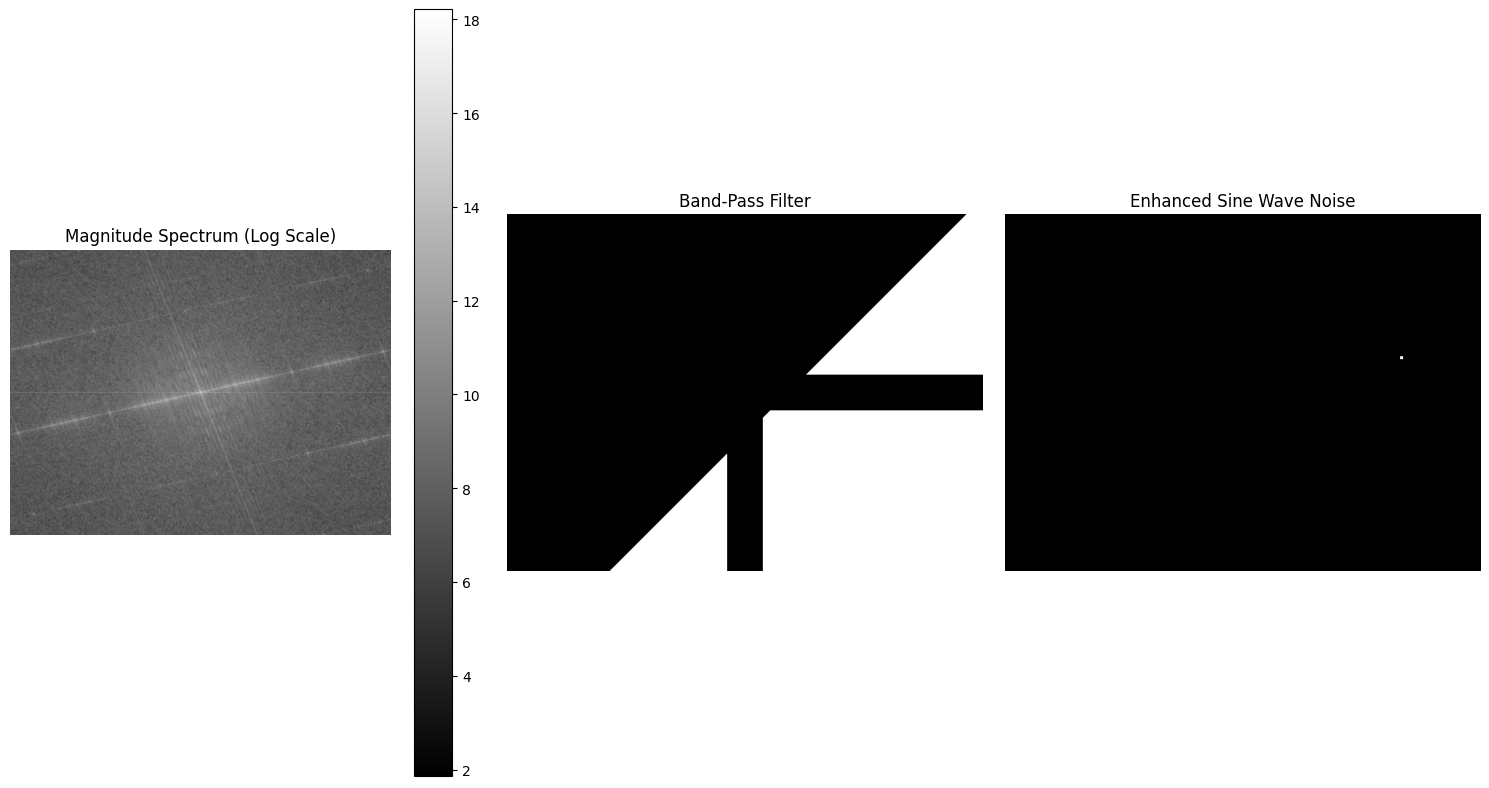

Noise sine waves detected.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2  # OpenCV library

def detect_and_remove_sine_waves(image, z_score_threshold=2.5, low_freq_cutoff_ratio=0.02, high_freq_cutoff_ratio=0.5):
    """
    Detect and remove noise sine waves in an image while avoiding structured patterns (e.g., barcodes).

    Parameters:
        image (numpy.ndarray): Input image (grayscale).
        z_score_threshold (float): Z-score threshold for detecting noise.
        low_freq_cutoff_ratio (float): Low frequency cutoff as a ratio of image size.
        high_freq_cutoff_ratio (float): High frequency cutoff as a ratio of image size.

    Returns:
        numpy.ndarray: Image with sine wave noise removed.
    """
    gray_image = image

    # Apply FFT to transform the image to the frequency domain
    dft = np.fft.fft2(gray_image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = np.abs(dft_shift)

    # Compute z-scores of the magnitude spectrum
    mean_mag = np.mean(magnitude_spectrum)
    std_mag = np.std(magnitude_spectrum)
    z_scores = (magnitude_spectrum - mean_mag) / std_mag

    # Create a frequency filter
    rows, cols = gray_image.shape
    center_row, center_col = rows // 2, cols // 2
    low_freq_cutoff = int(min(rows, cols) * low_freq_cutoff_ratio)
    high_freq_cutoff = int(min(rows, cols) * high_freq_cutoff_ratio)

    # Create a circular band-pass filter
    y, x = np.ogrid[:rows, :cols]
    distance_from_center = np.sqrt((x - center_col)**2 + (y - center_row)**2)
    band_pass_filter = (distance_from_center >= low_freq_cutoff) & (distance_from_center <= high_freq_cutoff)

    # Exclude central frequencies
    exclusion_width = int(min(rows, cols) * 0.05)
    band_pass_filter[center_row - exclusion_width:center_row + exclusion_width, :] = False
    band_pass_filter[:, center_col - exclusion_width:center_col + exclusion_width] = False

    # Apply the band-pass filter to the z-score mask
    sine_wave_mask = (z_scores > z_score_threshold) & band_pass_filter

    # Invert the mask to suppress the noise
    dft_shift *= ~sine_wave_mask

    # Inverse FFT to convert back to spatial domain
    dft_shift_inverse = np.fft.ifftshift(dft_shift)
    cleaned_image = np.fft.ifft2(dft_shift_inverse)
    cleaned_image = np.abs(cleaned_image)

    return cleaned_image

# Load an image
img_path = "test cases/11 - bayza 5ales di bsara7a.jpg"  # Replace with your image path'
image = Image.open(img_path).convert('L')  # Convert to grayscale if necessary
gray_image_np = np.array(image)

# Call the function to detect and remove sine waves
cleaned_image = detect_and_remove_sine_waves(gray_image_np)

# Display the original and cleaned images
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(gray_image_np, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(cleaned_image, cmap='gray'), plt.title('Cleaned Image')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\LECS AND SHEETS\\Computer vision\\Computer-Vision-Project\\test case\\11 - bayza 5ales di bsara7a.jpg'